In [13]:
# -------------------------------
# 1️⃣ LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Use a simple plotting style
plt.style.use('default')


In [7]:
# -------------------------------
# 2️⃣ DATA ACQUISITION
# -------------------------------
ticker = 'AMZN'
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download data
amzn_data = yf.download(
    ticker,
    start=start_date,
    end=end_date,
    progress=False
)

# Show columns
print("Columns in downloaded data:", amzn_data.columns)

# Use Close price
amzn_data = amzn_data[['Close']]

# Rename for consistency
amzn_data.rename(columns={'Close': 'Price'}, inplace=True)

# Preview
amzn_data.head()


Columns in downloaded data: MultiIndex([( 'Close', 'AMZN'),
            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])


Price,Price
Ticker,AMZN
Date,
2018-01-02,59.450500
2018-01-03,60.209999
2018-01-04,60.479500
2018-01-05,61.457001
2018-01-08,62.343498


In [8]:
# -------------------------------
# 3️⃣ DATA CLEANING & VALIDATION
# -------------------------------
# Check missing values
print("\nMissing values:")
print(amzn_data.isnull().sum())

# Basic info
print("\nData info:")
print(amzn_data.info())

# Summary statistics
print("\nSummary statistics:")
print(amzn_data.describe())

# Ensure sorted by date
amzn_data.sort_index(inplace=True)



Missing values:
Price  Ticker
Price  AMZN      0
dtype: int64

Data info:
<class 'pandas.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Price, AMZN)  1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB
None

Summary statistics:
Price         Price
Ticker         AMZN
count   1259.000000
mean     119.812384
std       35.592042
min       59.450500
25%       88.930500
50%      107.783501
75%      158.086998
max      186.570496


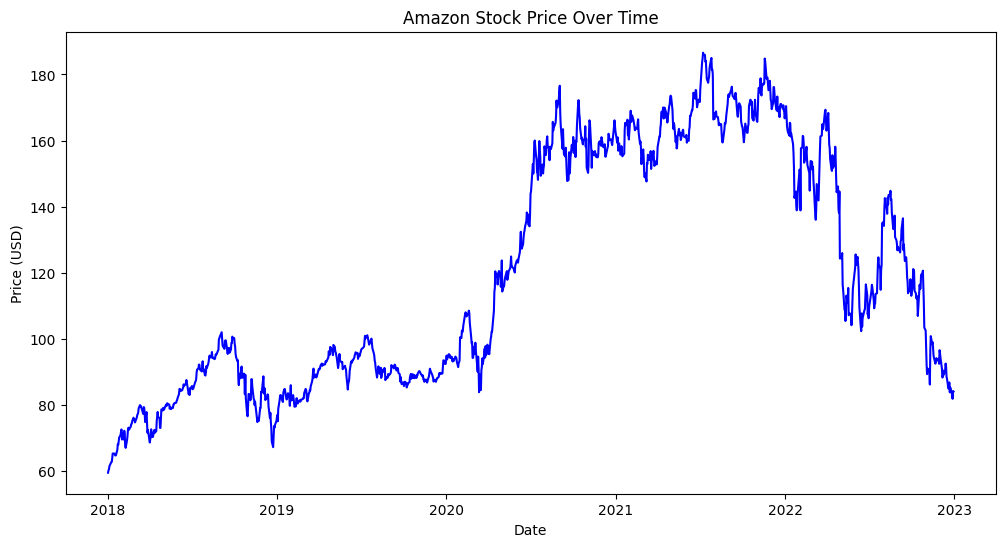

In [9]:
# -------------------------------
# 4️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(amzn_data.index, amzn_data['Price'], color='blue')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()



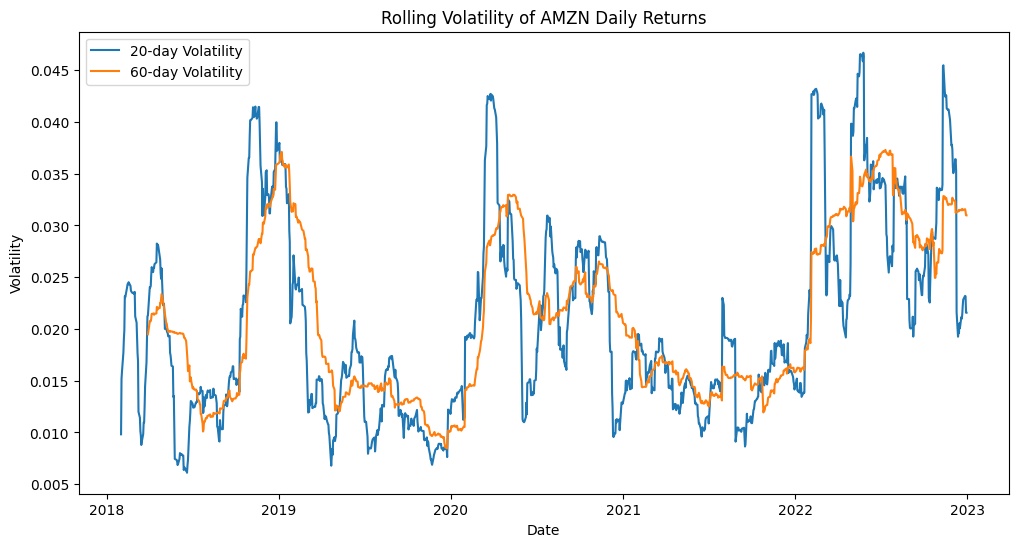

In [10]:
# -------------------------------
# 5️⃣ RETURNS & VOLATILITY
# -------------------------------
# Daily returns
amzn_data['Daily_Return'] = amzn_data['Price'].pct_change()

# Rolling volatility
amzn_data['Volatility_20d'] = amzn_data['Daily_Return'].rolling(20).std()
amzn_data['Volatility_60d'] = amzn_data['Daily_Return'].rolling(60).std()

# Plot volatilities
plt.figure(figsize=(12,6))
plt.plot(amzn_data.index, amzn_data['Volatility_20d'], label='20-day Volatility')
plt.plot(amzn_data.index, amzn_data['Volatility_60d'], label='60-day Volatility')
plt.title('Rolling Volatility of AMZN Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


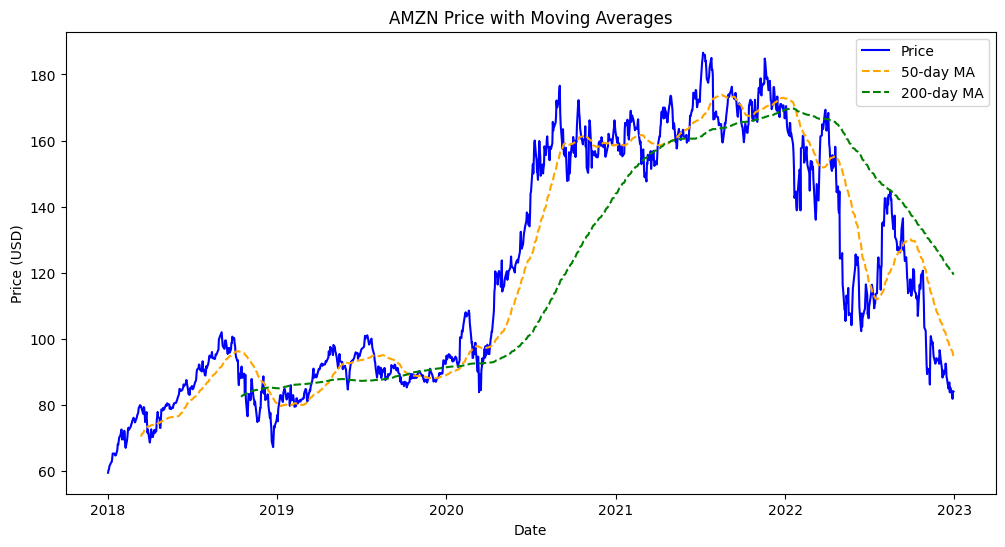

In [11]:
# -------------------------------
# 6️⃣ MOVING AVERAGES
# -------------------------------
# Compute moving averages
amzn_data['MA_50'] = amzn_data['Price'].rolling(50).mean().squeeze()
amzn_data['MA_200'] = amzn_data['Price'].rolling(200).mean().squeeze()

# Plot price + moving averages
plt.figure(figsize=(12,6))
plt.plot(amzn_data['Price'], label='Price', color='blue')
plt.plot(amzn_data['MA_50'], linestyle='--', label='50-day MA', color='orange')
plt.plot(amzn_data['MA_200'], linestyle='--', label='200-day MA', color='green')
plt.title('AMZN Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



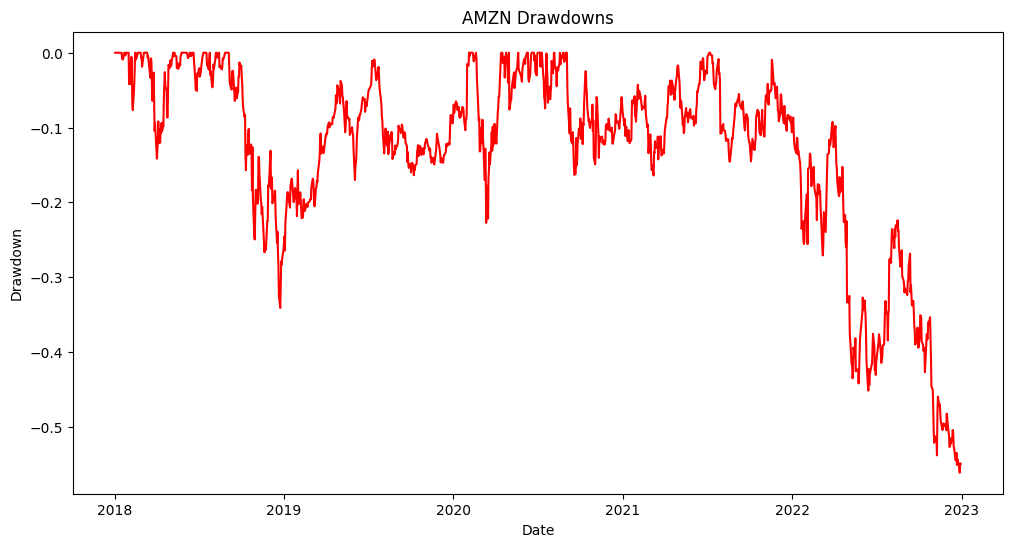

In [12]:
# -------------------------------
# 7️⃣ DRAWDOWN ANALYSIS
# -------------------------------
# Cumulative max
cumulative_max = amzn_data['Price'].cummax()

# Drawdowns
amzn_data['Drawdown'] = (amzn_data['Price'] - cumulative_max) / cumulative_max

# Plot drawdowns
plt.figure(figsize=(12,6))
plt.plot(amzn_data.index, amzn_data['Drawdown'], color='red')
plt.title('AMZN Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()


## Key Insights

- Amazon’s daily returns exhibit volatility clustering, with high-volatility periods occurring during broader market stress.
- Short-term volatility reacts more sharply to shocks than long-term volatility, indicating different risk profiles across time horizons.
- The distribution of daily returns shows fat tails, highlighting the presence of extreme price movements.
- Moving averages help distinguish short-term price noise from longer-term trend direction.
- Drawdown analysis reveals asymmetric downside risk, where losses occur faster than recoveries.


## Business Implications

- Elevated volatility periods signal increased risk exposure and may require more conservative risk management decisions.
- Comparing short-term and long-term volatility supports alignment of strategies with investment horizon and risk tolerance.
- Trend indicators such as moving averages assist in separating temporary market fluctuations from structural changes.
- Drawdown metrics provide insight into worst-case downside risk, supporting more informed portfolio and stress-testing decisions.
